### **IMPORTANT:** DO NOT RUN THIS FILE AS MODEL TRAINING IS ALREADY DONE
#### Access the model files and related graphs as saved in the working directory

In [ ]:
from google.colab import drive #comment this out if working on local
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp "/content/drive/My Drive/SnapMeal/"* /content/

In [3]:
!nvidia-smi

Tue Mar 25 15:02:48 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   35C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.

In [ ]:
import cv2
import torch
from ultralytics import YOLO
from roboflow import Roboflow
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util

import os
from collections import Counter

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [6]:
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 165MB/s]



0: 448x640 1 bowl, 4 carrots, 1 dining table, 80.8ms
Speed: 10.1ms preprocess, 80.8ms inference, 402.3ms postprocess per image at shape (1, 3, 448, 640)


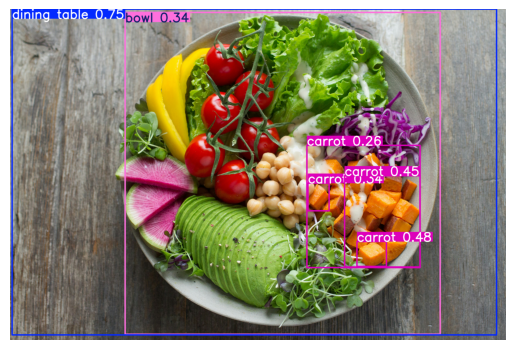

True

In [ ]:
image_path = "mixed-vegs.jpg"
image = cv2.imread(image_path)

results = model(image, conf=0.25)

for result in results:

    annotated_image = result.plot()  
    plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

cv2.imwrite("annotated_mixed_vegs.jpg", annotated_image)

### Fine-tuning using a Custom Dataset

Dataset I Link- https://universe.roboflow.com/savorgh-h5nhn/ingredients-detection-oe2q7/browse?queryText=salt&pageSize=50&startingIndex=0&browseQuery=true

In [8]:
from roboflow import Roboflow
rf = Roboflow(api_key="zcLdv7okg40C3J2m2udK")
project = rf.workspace("savorgh-h5nhn").project("ingredients-detection-oe2q7")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ingredients-Detection-1 in yolov8:: 100%|██████████| 39752/39752 [00:05<00:00, 7198.33it/s]


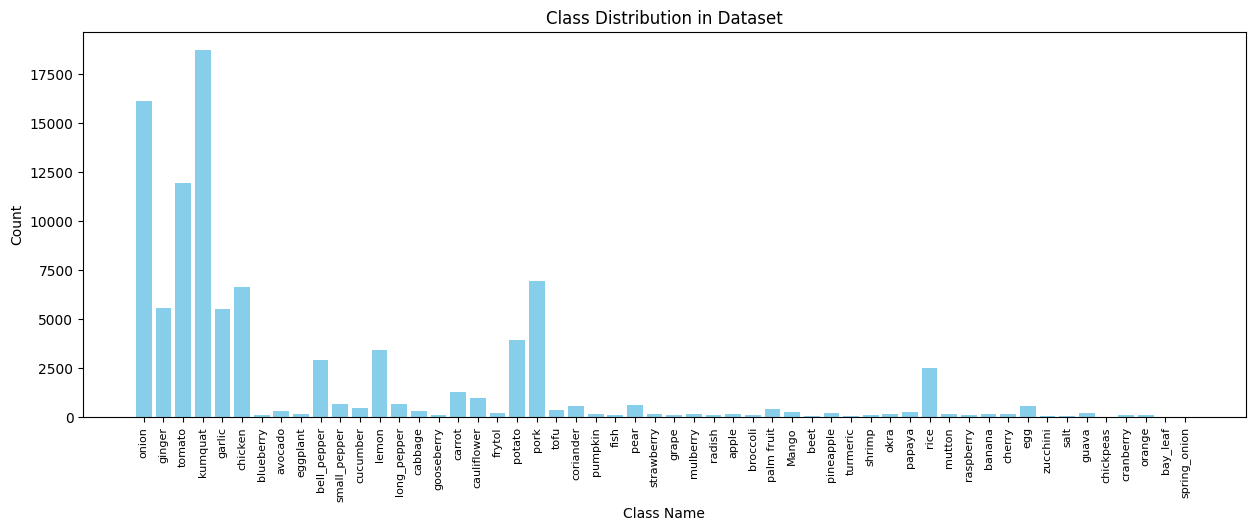

In [ ]:

# Path to labels folder
labels_dir = "/content/Ingredients-Detection-1/train/labels"

# Class names from YAML
class_names = [
    "Mango", "apple", "avocado", "banana", "bay_leaf", "beet", "bell_pepper",
    "blueberry", "broccoli", "cabbage", "carrot", "cauliflower", "cherry",
    "chicken", "chickpeas", "coriander", "cranberry", "cucumber", "egg",
    "eggplant", "fish", "frytol", "garlic", "ginger", "gooseberry", "grape",
    "guava", "kumquat", "lemon", "long_pepper", "mulberry", "mutton", "okra",
    "onion", "orange", "palm fruit", "papaya", "pear", "pineapple", "pork",
    "potato", "pumpkin", "radish", "raspberry", "rice", "salt", "shrimp",
    "small_pepper", "spring_onion", "strawberry", "tofu", "tomato", "turmeric",
    "zucchini"
]


# Count occurrences of each class
class_counts = Counter()
for file in os.listdir(labels_dir):
    with open(os.path.join(labels_dir, file), "r") as f:
        for line in f:
            class_id = int(line.split()[0])  # First value in YOLO label file is class ID
            class_counts[class_id] += 1

# Replace class IDs with names
class_counts_named = {class_names[k]: v for k, v in class_counts.items()}

# Plot
plt.figure(figsize=(15, 5))
plt.bar(class_counts_named.keys(), class_counts_named.values(), color="skyblue")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=90, fontsize=8)
plt.show()


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


labels_path = "/content/Ingredients-Detection-1/train/labels"

class_counts = Counter()

for file in os.listdir(labels_path):
    if file.endswith(".txt"):
        with open(os.path.join(labels_path, file), "r") as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1

for class_id, count in sorted(class_counts.items(), key=lambda x: x[1]):  
    print(f"Class {class_names[class_id]}: {count} instances")


Class spring_onion: 1 instances
Class bay_leaf: 14 instances
Class chickpeas: 24 instances
Class zucchini: 26 instances
Class beet: 32 instances
Class turmeric: 65 instances
Class salt: 65 instances
Class cranberry: 79 instances
Class broccoli: 85 instances
Class grape: 93 instances
Class shrimp: 99 instances
Class orange: 101 instances
Class gooseberry: 104 instances
Class fish: 107 instances
Class radish: 110 instances
Class blueberry: 121 instances
Class raspberry: 125 instances
Class mulberry: 141 instances
Class apple: 142 instances
Class cherry: 142 instances
Class pumpkin: 145 instances
Class strawberry: 158 instances
Class banana: 163 instances
Class mutton: 165 instances
Class eggplant: 170 instances
Class okra: 174 instances
Class frytol: 200 instances
Class guava: 202 instances
Class pineapple: 210 instances
Class papaya: 234 instances
Class Mango: 268 instances
Class avocado: 299 instances
Class cabbage: 300 instances
Class tofu: 364 instances
Class palm fruit: 413 instance

In [ ]:

labels_path = "/content/Ingredients-Detection-1/train/labels"
images_path = "/content/Ingredients-Detection-1/train/images"
output_path = "/content/Ingredients-Detection-1/balanced_dataset"


MIN_SAMPLES = 2000   
MAX_SAMPLES = 10000  


if os.path.exists(output_path):
    rmtree(output_path)
os.makedirs(f"{output_path}/images", exist_ok=True)
os.makedirs(f"{output_path}/labels", exist_ok=True)

In [ ]:


# counting samples for each class
class_counts = Counter()
file_classes = {}
for file in os.listdir(labels_path):
    if file.endswith(".txt"):
        with open(os.path.join(labels_path, file), "r") as f:
            class_ids = [int(line.split()[0]) for line in f.readlines()]
            file_classes[file] = class_ids
            for class_id in class_ids:
                class_counts[class_id] += 1

In [ ]:


# Augmentation pipeline 
def augment_image(img_path, txt_path, num_needed):
    img = cv2.imread(img_path)
    augmentations = A.Compose([
        A.HorizontalFlip(p=0.5),
        A.Rotate(limit=20, p=0.5),
        A.RandomBrightnessContrast(p=0.2),
        A.GaussianBlur(p=0.2),
    ])

    for i in range(num_needed):
        augmented = augmentations(image=img)["image"]
        aug_img_path = f"{output_path}/images/aug_{i}_{os.path.basename(img_path)}"
        aug_txt_path = f"{output_path}/labels/aug_{i}_{os.path.basename(txt_path)}"
        cv2.imwrite(aug_img_path, augmented)
        copyfile(txt_path, aug_txt_path) 


In [ ]:


balanced_counts = Counter()
downsample_pool = {class_id: [] for class_id in class_counts.keys()}

for file, class_ids in file_classes.items():
    txt_path = os.path.join(labels_path, file)
    img_path = os.path.join(images_path, file.replace(".txt", ".jpg"))
    if not os.path.exists(img_path):
        continue

    # downsampling if class > max
    for c in class_ids:
        if class_counts[c] > MAX_SAMPLES:
            downsample_pool[c].append((img_path, txt_path))
        else:
            copyfile(img_path, f"{output_path}/images/{file.replace('.txt', '.jpg')}")
            copyfile(txt_path, f"{output_path}/labels/{file}")
            balanced_counts[c] += 1


for class_id, files in downsample_pool.items():
    random.shuffle(files)  
    selected_files = files[:MAX_SAMPLES]

    for img_path, txt_path in selected_files:
        copyfile(img_path, f"{output_path}/images/{os.path.basename(img_path)}")
        copyfile(txt_path, f"{output_path}/labels/{os.path.basename(txt_path)}")
        balanced_counts[class_id] += 1

# we apply augmentation if class < min
for class_id, count in balanced_counts.items():
    if count < MIN_SAMPLES:
        num_needed = MIN_SAMPLES - count
        sample_files = [f for f, ids in file_classes.items() if class_id in ids]
        if not sample_files:
            continue
        num_per_sample = max(1, num_needed // len(sample_files))

        for img_file in sample_files:
            if num_needed <= 0:
                break
            augment_image(
                os.path.join(images_path, img_file.replace(".txt", ".jpg")),
                os.path.join(labels_path, img_file),
                min(num_per_sample, num_needed)
            )
            num_needed -= num_per_sample

print("✅ Dataset balancing complete! Check the 'balanced_dataset' folder.")


✅ Dataset balancing complete! Check the 'balanced_dataset' folder.


In [13]:
from collections import Counter
import os

labels_path = "/content/Ingredients-Detection-1/balanced_dataset/labels"

class_counts = Counter()
for file in os.listdir(labels_path):
    if file.endswith(".txt"):
        with open(os.path.join(labels_path, file), "r") as f:
            for line in f:
                class_id = int(line.split()[0])
                class_counts[class_id] += 1

print("Class Distribution After Balancing:", class_counts)


Class Distribution After Balancing: Counter({33: 25319, 51: 22391, 27: 18690, 39: 14336, 22: 13729, 10: 10812, 40: 10805, 13: 9429, 23: 9423, 18: 7089, 36: 7020, 34: 6666, 26: 6262, 6: 6087, 9: 5778, 28: 5552, 32: 5220, 0: 4556, 5: 4512, 3: 4401, 43: 4104, 38: 3990, 17: 3670, 49: 3631, 21: 3400, 42: 3300, 7: 3206, 30: 3186, 16: 3160, 12: 3103, 41: 3037, 24: 2600, 25: 2511, 44: 2490, 52: 2470, 15: 2452, 14: 2376, 46: 2376, 47: 2366, 29: 2298, 8: 2125, 20: 2033, 19: 2024, 48: 2000, 1: 1988, 4: 1988, 31: 1980, 53: 1976, 45: 1950, 37: 1902, 11: 1888, 50: 1820, 2: 1794, 35: 1652})


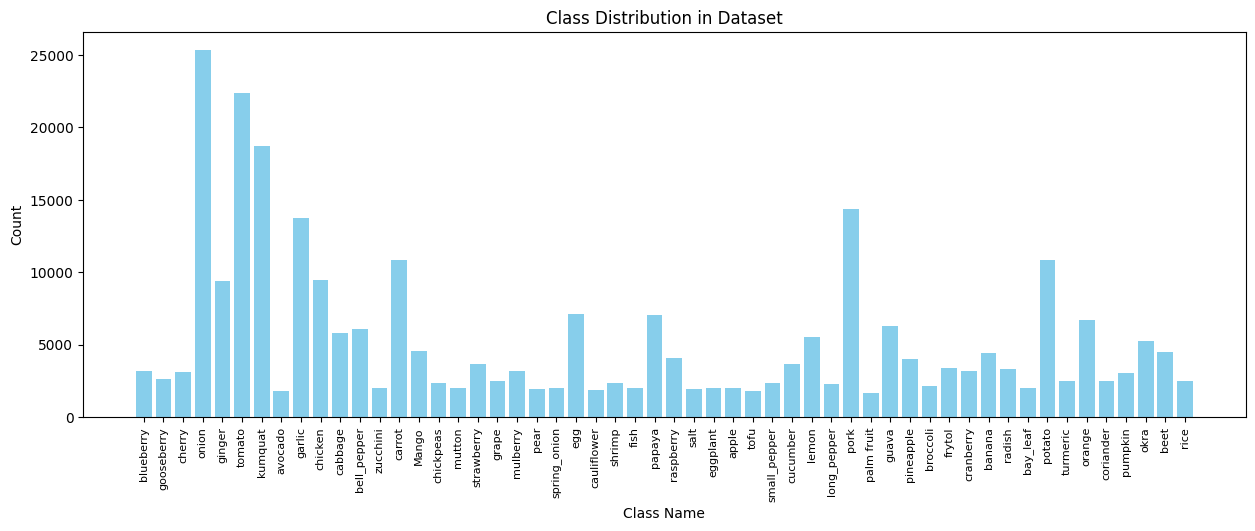

In [ ]:


labels_dir = "/content/Ingredients-Detection-1/balanced_dataset/labels"


class_names = [
    "Mango", "apple", "avocado", "banana", "bay_leaf", "beet", "bell_pepper",
    "blueberry", "broccoli", "cabbage", "carrot", "cauliflower", "cherry",
    "chicken", "chickpeas", "coriander", "cranberry", "cucumber", "egg",
    "eggplant", "fish", "frytol", "garlic", "ginger", "gooseberry", "grape",
    "guava", "kumquat", "lemon", "long_pepper", "mulberry", "mutton", "okra",
    "onion", "orange", "palm fruit", "papaya", "pear", "pineapple", "pork",
    "potato", "pumpkin", "radish", "raspberry", "rice", "salt", "shrimp",
    "small_pepper", "spring_onion", "strawberry", "tofu", "tomato", "turmeric",
    "zucchini"
]


class_counts = Counter()
for file in os.listdir(labels_dir):
    with open(os.path.join(labels_dir, file), "r") as f:
        for line in f:
            class_id = int(line.split()[0])  
            class_counts[class_id] += 1


class_counts_named = {class_names[k]: v for k, v in class_counts.items()}


plt.figure(figsize=(15, 5))
plt.bar(class_counts_named.keys(), class_counts_named.values(), color="skyblue")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")
plt.xticks(rotation=90, fontsize=8)
plt.show()



In [ ]:
from ultralytics import YOLO
import torch


model = YOLO("yolov8m.pt")


freeze_layers = 10 

for i, (name, param) in enumerate(model.model.named_parameters()):
    if i < freeze_layers:
        param.requires_grad = False  # Freeze layer

# Training parameters
train_data = "/content/Ingredients-Detection-1/data.yaml"
epochs = 30
batch_size = 8
img_size = 640  
device = "cuda" if torch.cuda.is_available() else "cpu"

results = model.train(
    data=train_data,
    epochs=epochs,
    batch=batch_size,
    imgsz=img_size,
    device=device,
    workers=2,  
    freeze=[0, 10],  # only last layers are trained
    patience=10,  # stops training if no improvement for 10 epochs
    save=True,  
)

best_model_path = results.best  
model.export(format="onnx")  # Saves best model in ONNX format for compatibility

print(f"✅ Training complete! Best model saved at: {best_model_path}")


Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Ingredients-Detection-1/data.yaml, epochs=30, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=[0, 10], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 99.1MB/s]

Overriding model.yaml nc=80 with nc=54

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             


  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 374MB/s]


AMP: checks passed ✅


train: Scanning /content/Ingredients-Detection-1/train/labels... 16886 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16886/16886 [00:11<00:00, 1449.41it/s]


train: New cache created: /content/Ingredients-Detection-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1114, len(boxes) = 95015. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Ingredients-Detection-1/valid/labels... 1440 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1440/1440 [00:01<00:00, 1355.54it/s]

val: New cache created: /content/Ingredients-Detection-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 145, len(boxes) = 11299. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000172, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      3.94G      1.187       1.47      1.407         69        640: 100%|██████████| 2111/2111 [05:19<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:14<00:00,  6.38it/s]


                   all       1440      11299      0.756      0.646      0.665      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      5.11G      1.095     0.8371      1.322         43        640: 100%|██████████| 2111/2111 [05:00<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.75it/s]


                   all       1440      11299      0.707      0.676      0.681      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      5.18G      1.072     0.7686      1.309         38        640: 100%|██████████| 2111/2111 [04:56<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.76it/s]


                   all       1440      11299      0.796      0.682      0.721      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      5.24G       1.06     0.7227      1.298         41        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.81it/s]


                   all       1440      11299      0.733      0.734      0.768      0.566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      5.31G      1.027     0.6632      1.271         76        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.77it/s]


                   all       1440      11299      0.782      0.743      0.773      0.568

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      5.38G      1.008     0.6286      1.259         63        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.78it/s]


                   all       1440      11299      0.795      0.763      0.794      0.599

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      5.44G     0.9947     0.6058      1.249         50        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.76it/s]


                   all       1440      11299      0.792      0.779      0.821       0.62

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      5.51G     0.9789     0.5839       1.24         78        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.80it/s]


                   all       1440      11299      0.806      0.806      0.821      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      5.57G     0.9691      0.571      1.229         83        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.75it/s]


                   all       1440      11299       0.84      0.794      0.824      0.626

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      5.64G     0.9563     0.5557      1.231         88        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.80it/s]


                   all       1440      11299      0.821      0.788      0.825      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      5.71G     0.9511     0.5431      1.218         54        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.81it/s]


                   all       1440      11299      0.849      0.798      0.841      0.644

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      5.78G     0.9378     0.5314      1.211         24        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.76it/s]


                   all       1440      11299      0.816      0.816      0.841      0.643

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      5.84G     0.9267     0.5153      1.204         32        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.76it/s]


                   all       1440      11299      0.832      0.814      0.853      0.649

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      5.91G     0.9119     0.5053      1.192         39        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.80it/s]


                   all       1440      11299      0.828      0.863      0.863      0.666

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      6.44G     0.9113     0.4977      1.194         22        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.77it/s]


                   all       1440      11299      0.833      0.845      0.848      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       6.5G     0.9043     0.4871      1.187         97        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.79it/s]


                   all       1440      11299      0.847      0.836      0.862       0.67

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      6.57G     0.8944     0.4854      1.189         41        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.77it/s]


                   all       1440      11299      0.818      0.845      0.853      0.664

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      6.64G     0.8857     0.4711      1.179         43        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.78it/s]


                   all       1440      11299      0.852      0.815      0.873      0.683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      6.71G     0.8753     0.4575      1.174         49        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.77it/s]


                   all       1440      11299       0.82      0.834      0.864      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.77G     0.8707     0.4554      1.167         74        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.76it/s]


                   all       1440      11299      0.835      0.872      0.875      0.687
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       7.3G     0.8431     0.3899      1.177         30        640: 100%|██████████| 2111/2111 [04:53<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.72it/s]


                   all       1440      11299      0.865      0.862      0.889      0.701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.37G     0.8296     0.3784      1.162         21        640: 100%|██████████| 2111/2111 [04:53<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.77it/s]


                   all       1440      11299      0.847      0.879      0.887      0.697

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.43G     0.8158     0.3672       1.15         24        640: 100%|██████████| 2111/2111 [04:53<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.77it/s]


                   all       1440      11299      0.828      0.872       0.87      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       7.5G     0.8074     0.3585      1.143         12        640: 100%|██████████| 2111/2111 [04:53<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.75it/s]


                   all       1440      11299       0.85      0.832       0.86      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.57G     0.7943     0.3523      1.139         17        640: 100%|██████████| 2111/2111 [04:53<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.73it/s]


                   all       1440      11299       0.85      0.847      0.862      0.677

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.63G      0.784      0.345      1.135         28        640: 100%|██████████| 2111/2111 [04:55<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.73it/s]


                   all       1440      11299      0.807      0.891      0.869      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       7.7G     0.7765     0.3387      1.127         27        640: 100%|██████████| 2111/2111 [04:54<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.76it/s]


                   all       1440      11299      0.853      0.837      0.872      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      8.47G     0.7661      0.332      1.119         62        640: 100%|██████████| 2111/2111 [04:53<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.74it/s]


                   all       1440      11299      0.867      0.844      0.888        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      8.54G     0.7578     0.3261      1.118         64        640: 100%|██████████| 2111/2111 [04:53<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.75it/s]


                   all       1440      11299      0.875      0.852       0.88       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      8.61G     0.7499     0.3229      1.109         38        640: 100%|██████████| 2111/2111 [04:53<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:13<00:00,  6.74it/s]


                   all       1440      11299      0.847      0.836      0.869      0.682

30 epochs completed in 2.583 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.96 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 92 layers, 25,871,026 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:14<00:00,  6.35it/s]


                   all       1440      11299      0.865      0.862      0.889      0.701
                 Mango         36         82      0.627      0.829      0.745      0.657
                 apple         40         42      0.992      0.976      0.994      0.794
               avocado         56         56          1          1      0.995      0.993
                banana         20         43      0.872       0.93      0.946      0.734
                  beet          1          1      0.236          1      0.995      0.895
           bell_pepper        102        118      0.914      0.897      0.944      0.707
             blueberry         25         38      0.855      0.974      0.915       0.74
               cabbage          7          7      0.584      0.805       0.75      0.534
                carrot         66         80      0.901        0.9      0.945      0.673
                cherry         24         31      0.948      0.871       0.91      0.716
               chicke

AttributeError: 'DetMetrics' object has no attribute 'best'. See valid attributes below.

    Utility class for computing detection metrics such as precision, recall, and mean average precision (mAP).

    Attributes:
        save_dir (Path): A path to the directory where the output plots will be saved.
        plot (bool): A flag that indicates whether to plot precision-recall curves for each class.
        names (dict): A dictionary of class names.
        box (Metric): An instance of the Metric class for storing detection results.
        speed (dict): A dictionary for storing execution times of different parts of the detection process.
        task (str): The task type, set to 'detect'.
    

In [16]:
best_model_path = "runs/detect/train/weights/best.pt"

In [21]:
import shutil

src = "/content/runs/detect/train/weights/best.pt"
dst = "/content/drive/My Drive/SnapMeal/model1.pt"

shutil.copy(src, dst)
print("Model saved successfully!")



Model saved successfully!


In [ ]:
results_path = "/content/runs/detect/train/results.csv"  
df = pd.read_csv(results_path)


df.tail()


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
25,26,8067.83,0.78402,0.34503,1.13467,0.80737,0.89147,0.86853,0.68383,0.82197,0.48882,1.15934,0.000030,0.000030,0.000030
26,27,8375.94,0.77651,0.33866,1.12650,0.85332,0.83687,0.87166,0.68508,0.82219,0.49495,1.15145,0.000024,0.000024,0.000024
27,28,8683.91,0.76611,0.33195,1.11909,0.86721,0.84394,0.88753,0.69959,0.81929,0.50361,1.15871,0.000019,0.000019,0.000019
28,29,8991.54,0.75780,0.32609,1.11802,0.87465,0.85247,0.88023,0.68977,0.81936,0.49724,1.16103,0.000013,0.000013,0.000013
29,30,9299.24,0.74993,0.32293,1.10940,0.84738,0.83556,0.86890,0.68230,0.81701,0.49363,1.15465,0.000007,0.000007,0.000007


These training results summarize the model's performance over the final epochs.

1. Box loss, class loss, and DFL loss measure how well the model is learning to detect objects; lower values indicate better performance.
2. The metrics (precision, recall, mAP50, and mAP50-95) show how accurately the model detects objects—higher values are better.
3. The validation losses help assess how well the model generalizes to new data. Learning rates (lr/pg0, pg1, pg2) decrease over time, ensuring stable convergence.

Looking at the loss values, the box loss decreased from 0.784 at epoch 25 to 0.749 at epoch 30, meaning the model is getting better at localizing objects. Similarly, the class loss went from 0.345 to 0.322, and DFL loss improved slightly from 1.134 to 1.109.

This means that the box loss represents how well the model is detecting and drawing bounding boxes around ingredients like tomatoes, onions, or chilies in an image. A decrease from 0.784 to 0.749 means the model is getting better at precisely localizing these ingredients.

The class loss measures how accurately the model is classifying the detected objects—whether it correctly labels an object as a tomato instead of mistaking it for a red bell pepper. Since this loss dropped from 0.345 to 0.322, the model is improving in distinguishing between similar-looking ingredients. Finally, the DFL (Distribution Focal Loss) helps refine the model's predictions on object boundaries. A slight improvement from 1.134 to 1.109 indicates the model is making finer adjustments to where each ingredient begins and ends

What matters to us is that the model's performance improved, with mAP50 reaching 88.7% at epoch 27, but slightly fluctuating afterward, suggesting possible fine-tuning needs.

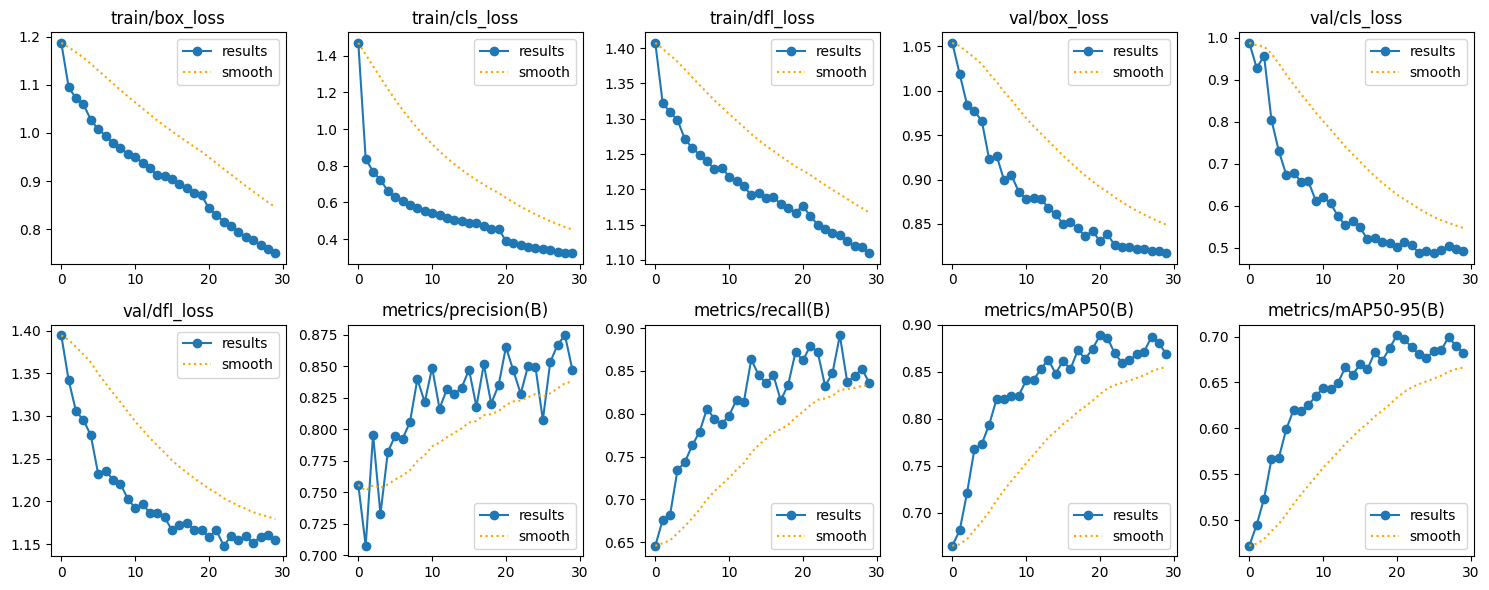

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("runs/detect/train/results.csv")

metrics = ["train/box_loss", "train/cls_loss", "train/dfl_loss",
           "val/box_loss", "val/cls_loss", "val/dfl_loss",
           "metrics/precision(B)", "metrics/recall(B)", "metrics/mAP50(B)", "metrics/mAP50-95(B)"]

def smooth(data, weight=0.9):
    smoothed = []
    last = data[0]  # First value
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point 
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

# Plot each metric
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    axes[i].plot(df.index, df[metric], label="results", linestyle="-", marker="o")  
    axes[i].plot(df.index, smooth(df[metric]), label="smooth", linestyle="dotted", color="orange")  
    axes[i].set_title(metric)
    axes[i].legend()

plt.tight_layout()
plt.show()


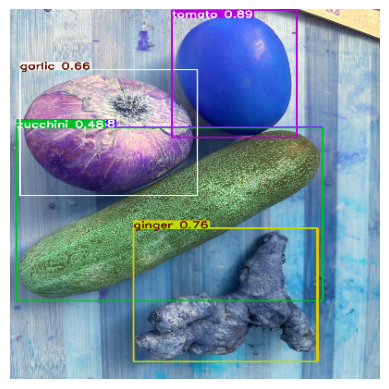

In [29]:
import cv2

for r in results:
    img_result = r.plot()
    img_resized = cv2.resize(img_result, (400, 400))  # Resize to 400x400 pixels
    plt.imshow(img_resized)
    plt.axis("off")
    plt.show()
